Be sure to install the following packages:
*pip install pandas
*pip install matplotlib

Number 01: Recreate the table below using numpy and pandas libraries [150 pts]

In [39]:
import pandas as pd
table = {
        'Grocery List': ['Tuna','Salmon','Luncheon meat','Rice','Bread','Butter','Milk','Eggs','Mixed vegetables'], 
        'Quantity': ['2 kilograms','3 kilograms','10 cans','50 kilograms','5 loaves','3 200-grams','5 liters','10 trays','2 300-grams'],
        'Price':['150.00 per kilo','180.00 per kilo','30.00 per can','26.00 per kilo','65.00 per load','60.00 per 200 grams','92.00 per liter','270.00 per tray','150.00 per 300 grams']
        }
dataFrame = pd.DataFrame(data=table)
dataFrame.set_index('Grocery List')


,Quantity,Price
Grocery List,,
Tuna,2 kilograms,150.00 per kilo
Salmon,3 kilograms,180.00 per kilo
Luncheon meat,10 cans,30.00 per can
Rice,50 kilograms,26.00 per kilo
Bread,5 loaves,65.00 per load
Butter,3 200-grams,60.00 per 200 grams
Milk,5 liters,92.00 per liter
Eggs,10 trays,270.00 per tray
Mixed vegetables,2 300-grams,150.00 per 300 grams


Number 02: Create a third column with column name “Total” indicating the total price
per item in the grocery list. [150 pts]


In [40]:
dataFrame['Total']=(dataFrame["Quantity"].str.extract(r'(^\d+)').astype(float))*(dataFrame["Price"].str.extract(r'(^\d+.\d{2})').astype(float))
dataFrame.set_index('Grocery List')

,Quantity,Price,Total
Grocery List,,,
Tuna,2 kilograms,150.00 per kilo,300.0
Salmon,3 kilograms,180.00 per kilo,540.0
Luncheon meat,10 cans,30.00 per can,300.0
Rice,50 kilograms,26.00 per kilo,1300.0
Bread,5 loaves,65.00 per load,325.0
Butter,3 200-grams,60.00 per 200 grams,180.0
Milk,5 liters,92.00 per liter,460.0
Eggs,10 trays,270.00 per tray,2700.0
Mixed vegetables,2 300-grams,150.00 per 300 grams,300.0


Number 03: Exploratory Data Analysis [400 pts

3.1 Find the cumulative sum of the total price of each item and display it as a bar graph.
Print the total price of the entire grocery list. [80 pts]

Total Price: 6405.00


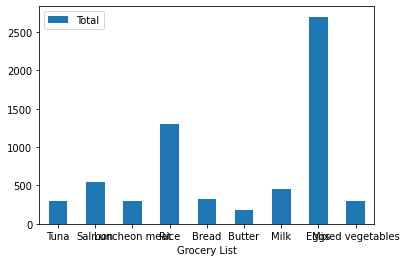

In [41]:
import matplotlib
cum_sum = dataFrame.plot.bar(x='Grocery List', y='Total', rot=0)
grocery_sum = dataFrame.Total.sum()

print("Total Price: %5.2f" % grocery_sum)


3.2 Sort and determine the top three most expensive items on the list. Display it as a table.
[80 pts]

In [42]:
sorted_df = dataFrame.sort_values(by='Total', ascending=False)
sorted_df

,Grocery List,Quantity,Price,Total
7,Eggs,10 trays,270.00 per tray,2700.0
3,Rice,50 kilograms,26.00 per kilo,1300.0
1,Salmon,3 kilograms,180.00 per kilo,540.0
6,Milk,5 liters,92.00 per liter,460.0
4,Bread,5 loaves,65.00 per load,325.0
0,Tuna,2 kilograms,150.00 per kilo,300.0
2,Luncheon meat,10 cans,30.00 per can,300.0
8,Mixed vegetables,2 300-grams,150.00 per 300 grams,300.0
5,Butter,3 200-grams,60.00 per 200 grams,180.0


3.3 Sort and determine the top three least expensive items on the list. Display it as a table.
[80 pts]


In [43]:
top_three = dataFrame.nlargest(3, 'Total')
top_three

,Grocery List,Quantity,Price,Total
7,Eggs,10 trays,270.00 per tray,2700.0
3,Rice,50 kilograms,26.00 per kilo,1300.0
1,Salmon,3 kilograms,180.00 per kilo,540.0


3.4 Determine the mean expenditure and the standard deviation. [80 pts]

In [44]:
mean_exp = dataFrame['Total'].mean()
sd = dataFrame['Total'].std()

print("Mean Expenditure: %5.2f \nStandard Deviation: %5.2f" % (mean_exp, sd))

Mean Expenditure: 711.67 
Standard Deviation: 816.47


3.5 Use a pie chart to visualize the distribution of total price of each item. [80 pts]

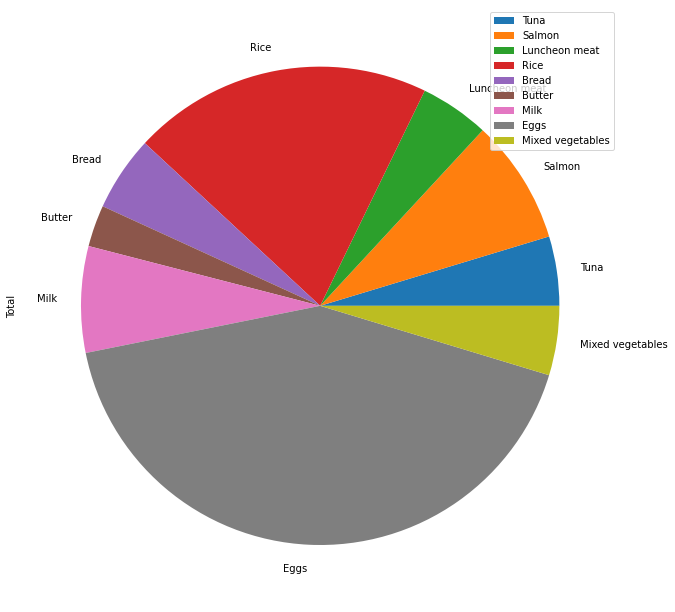

In [45]:
pie = dataFrame.plot.pie(y='Total', labels = dataFrame['Grocery List'], figsize=(11,11))